### Librairies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_columns = 999

### Lecture des données

In [2]:
df_labels = pd.read_json ('deezer_data/album_genres_new_releases.json' , lines = True )
df_data = pd.read_json ('deezer_data/sampled_geoloc_counters_new_releases.json' , lines = True )

### Pré-traitement des données

#### 1) Table Labels

In [3]:
binarized_df_labels = pd.get_dummies( df_labels , columns=['genre_name'] , prefix="" , prefix_sep="" )
df_multi_labels = binarized_df_labels.groupby(['album_id'] , as_index=False ).sum()
df_multi_labels.head()

,album_id,Afro Pop,Alternative,Blues,Chanson franÃ§aise,Chill Out/Trip-Hop/Lounge,Classique,ComÃ©dies musicales,Country,Dance,Dancehall/Ragga,Disco,Dub,East Coast,Electro,Electro Pop/Electro Rock,Films/Jeux vidÃ©o,Folk,Gospel,Hard Rock,Jazz,Jeunesse,Latino,Metal,Musique africaine,Musique arabe,Musique brÃ©silienne,Musique religieuse,Musiques de films,MÃºsica colombiana,OpÃ©ra,Pop,Pop IndÃ©,Pop indÃ©/Folk,Pop internationale,Pop latine,R&B,Rap franÃ§ais,Rap/Hip Hop,Reggae,Rock,Rock & Roll/Rockabilly,Rock franÃ§ais,Rock indÃ©,Singer & Songwriter,Soul,Soul & Funk,Sports,Techno/House,Trance,VariÃ©tÃ© Internationale,World
0,13972552,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13979628,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13986414,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13994594,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13994632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2) Table des données spatio-temporelle

In [4]:
df_data_ignoreTime = df_data.groupby(['album_id','loc_city'] , as_index=False )['nstreams','nusers'].sum()
df_data_ignoreTime_binarized =  pd.get_dummies( df_data_ignoreTime ,
                                               columns=['loc_city'] ,
                                               prefix="" , prefix_sep="" ).groupby(['album_id'] ,
                                                                                   as_index=False ).sum()
df_data_ignoreTime_binarized.head()

,album_id,nstreams,nusers,A Dos Cunhados,Abbeville,Abidjan,Ablon-sur-seine,Abrest,Abymes,Acheres,Achicourt,AchÃ¨res,AchÃ¨res-la-forÃªt,Adissan,Afa,Agadir,Agde,Agen,Agnetz,Ahmedabad,Aiffres,Aire-sur-la-lys,Aix-en-Provence,Aix-en-provence,Aix-les-Bains,Aix-les-bains,Aix-noulette,Aixe-sur-vienne,Aizenay,Ajaccio,Alata,Albertville,Albi,Albon,AlenÃ§on,Alfortville,Algiers,Algrange,Alicante,Alixan,Allauch,Allennes-les-Marais,Allennes-les-marais,Allevard,Allonnes,Almaty,Altkirch,AlÃ¨s,Amarens,Ambilly,Amboise,AmbÃ©rieu-en-bugey,Ametlla De Mar,Amiens,Amilly,AmnÃ©ville,Ampuis,Amsterdam,Ancenis,Andard,Andorra La Vella,Andresy,Andrezieux-Boutheon,AndrÃ©sy,AndrÃ©zieux,Anduze,Angers,Angerville,Angles,Anglet,AngoulÃªme,Angres,Aniane,Aniche,Ankara,Annecy,Annecy-le-Vieux,Annecy-le-vieux,Annemasse,Annequin,Annoeullin,Annonay,Anse,Antalya,Anthon,Antibes,Antony,Antwerpen,Anzin,Aoste,Appietto,Apprieu,Aprelevka,Apt,Arbusigny,Arcachon,Archamps,Arcis-sur-aube,Arcueil,Ardon,Arezzo,ArgelÃ¨s-sur-mer,Argences,Argens,Argenteuil,Argonay,Arles,Arleux,Armavir,Armbouts-cappel,ArmentiÃ¨res,Arnouville,Arpajon,Arras,Ars-sur-moselle,Artigues-pres-Bordeaux,Artigues-prÃ¨s-bordeaux,Asfeld,Ashburn,Aslonnes,Asnieres-sur-Seine,AsniÃ¨res,Aspiran,Aspremont,Astoria,Athens,Athis-Mons,Athis-de-l'orne,Athis-mons,Attiches,Aubagne,Aubenas,Aubencheul-aux-bois,Aubergenville,Aubers,Aubervilliers,Aubevoye,Aubignan,AubiÃ¨re,Auby,AubÃ©rives-sur-varÃ¨ze,Aucamville,Auch,Auchel,Auchy-les-mines,Auckland,Audenge,Audincourt,Audun-le-tiche,Aulnay-sous-Bois,Aulnay-sous-bois,Aulnois-sous-laon,Aulnoye-aymeries,Auray,Aurillac,Auriol,Aussonne,Austin,Auterive,Authume,Autry-le-chÃ¢tel,Autun,Auvers-saint-georges,Auvers-sur-oise,Auxerre,Auxonne,Avallon,Avermes,Avignon,Avion,Avize,Avranches,AvrillÃ©,Babson Park,Bagneux,Bagnolet,Bagnols-sur-Ceze,Bagnols-sur-cÃ¨ze,Baguio City,Baie-Mahault,Baie-mahault,Baillargues,Bailleul,Bailleval,Bailly,Bailly-romainvilliers,Baku,Balaruc-les-Bains,Balasore,Ballan-mirÃ©,Ballancourt,Ballancourt-sur-Essonne,Balma,Ban-saint-martin,Bandol,Bandung,Bangalore,Bangkok,Bar-le-Duc,Bar-le-duc,Barakaldo,Barberaz,Barcelona,Barentin,Bari,Barjouville,Barking,Barlin,Baron,Barr,Basauri,Basingstoke,Basse-Goulaine,Basse-goulaine,Basse-ham,Bastelicaccia,Bastia,Baud,Baule,Baume-les-dames,Bauvin,Bavans,Bayard-sur-marne,Bayeux,Bayonne,Beaugency,Beaumont,Beaumont-sur-Oise,Beaumont-sur-oise,Beaune,BeauprÃ©au,Beaurepaire,Beausemblant,Beausoleil,Beauvais,Beauvoir-sur-niort,Beauzelle,Beaver,Bechyne,Begles,Beijing,Beirut,Belfort,Belgorod,Belgrade,Bellegarde-sur-Valserine,Bellegarde-sur-valserine,Bellerive-sur-allier,Belleville-sur-saÃ´ne,Belley,Benfeld,Benglen,Berck,Bergamo,Bergen,Bergerac,Berlin,Bernardswiller,Bernay,Berre-l'Etang,Berre-l'etang,BesanÃ§on,Besnans,Bessan,Betton,Bezons,Biarritz,Bidart,Bienville,Biganos,Bihorel,Bilbao,Billancourt,Billere,Billom,Billy,BillÃ¨re,Binic,Biot,Birmingham,Bischheim,Bischoffsheim,Bischwihr,Bischwiller,Biviers,Blagnac,Blain,Blaise,Blida,Blois,BlÃ©nod-lÃ¨s-pont-Ã -mousson,BlÃ©nod-lÃ¨s-toul,Bobigny,BogotÃ¡,Boigny,Bois,Bois-Colombes,Bois-Guillaume,Bois-bernard,Bois-colombes,Bois-guillaume,Boissy-Saint-LÃ©ger,Boissy-saint-lÃ©ger,Bolbec,Bollate,Bollene,BollÃ¨ne,Bon-encontre,Bondoufle,Bondy,Bonneuil-en-france,Bonneuil-sur-marne,Bonneville,Bons,Bons-en-Chablais,Bonsecours,Bordeaux,Borehamwood,Borgo,Bosc-le-hard,Bossieu,Bouc-Bel-Air,Bouc-bel-air,Bouchemaine,BouffÃ©rÃ©,Bougival,Bouguenais,Boulay,Boulbon,Bouliac,Bouloc,Boulogne,Boulogne-Billancourt,Boulogne-billancourt,Boulogne-sur-Mer,Boulogne-sur-mer,Bourbriac,Bourg-en-Bresse,Bourg-en-bresse,Bourg-la-Reine,Bourg-la-reine,Bourg-les-Valence,Bourg-lÃ¨s-valence,Bourges,Bourgoin,BourguÃ©bus,Bousselange,Boussy-saint-antoine,BouxiÃ¨res-aux-chÃªnes,BouxiÃ¨res-aux-dames,Bouzonville,Boves,BoÃ«ge,Braintree,Bram,Bratsk,Brazey-en-plaine,Bressols,Brest,Breteuil,Breuil-le-sec,Brie-Comte-Robert,Brie-comte-robert,Briey,Brignais,Brignoles,Brin-sur-seille,Brindas,Brioude,Brisbane,Brissac,Brive-la-Gaillarde,Brive-la-gaillarde,Brockport,B

#### 3) Jointure

In [5]:
final_df = pd.merge(df_data_ignoreTime_binarized , df_multi_labels , on='album_id')
print(final_df.shape)
final_df.head()

(1543, 2737)


,album_id,nstreams,nusers,A Dos Cunhados,Abbeville,Abidjan,Ablon-sur-seine,Abrest,Abymes,Acheres,Achicourt,AchÃ¨res,AchÃ¨res-la-forÃªt,Adissan,Afa,Agadir,Agde,Agen,Agnetz,Ahmedabad,Aiffres,Aire-sur-la-lys,Aix-en-Provence,Aix-en-provence,Aix-les-Bains,Aix-les-bains,Aix-noulette,Aixe-sur-vienne,Aizenay,Ajaccio,Alata,Albertville,Albi,Albon,AlenÃ§on,Alfortville,Algiers,Algrange,Alicante,Alixan,Allauch,Allennes-les-Marais,Allennes-les-marais,Allevard,Allonnes,Almaty,Altkirch,AlÃ¨s,Amarens,Ambilly,Amboise,AmbÃ©rieu-en-bugey,Ametlla De Mar,Amiens,Amilly,AmnÃ©ville,Ampuis,Amsterdam,Ancenis,Andard,Andorra La Vella,Andresy,Andrezieux-Boutheon,AndrÃ©sy,AndrÃ©zieux,Anduze,Angers,Angerville,Angles,Anglet,AngoulÃªme,Angres,Aniane,Aniche,Ankara,Annecy,Annecy-le-Vieux,Annecy-le-vieux,Annemasse,Annequin,Annoeullin,Annonay,Anse,Antalya,Anthon,Antibes,Antony,Antwerpen,Anzin,Aoste,Appietto,Apprieu,Aprelevka,Apt,Arbusigny,Arcachon,Archamps,Arcis-sur-aube,Arcueil,Ardon,Arezzo,ArgelÃ¨s-sur-mer,Argences,Argens,Argenteuil,Argonay,Arles,Arleux,Armavir,Armbouts-cappel,ArmentiÃ¨res,Arnouville,Arpajon,Arras,Ars-sur-moselle,Artigues-pres-Bordeaux,Artigues-prÃ¨s-bordeaux,Asfeld,Ashburn,Aslonnes,Asnieres-sur-Seine,AsniÃ¨res,Aspiran,Aspremont,Astoria,Athens,Athis-Mons,Athis-de-l'orne,Athis-mons,Attiches,Aubagne,Aubenas,Aubencheul-aux-bois,Aubergenville,Aubers,Aubervilliers,Aubevoye,Aubignan,AubiÃ¨re,Auby,AubÃ©rives-sur-varÃ¨ze,Aucamville,Auch,Auchel,Auchy-les-mines,Auckland,Audenge,Audincourt,Audun-le-tiche,Aulnay-sous-Bois,Aulnay-sous-bois,Aulnois-sous-laon,Aulnoye-aymeries,Auray,Aurillac,Auriol,Aussonne,Austin,Auterive,Authume,Autry-le-chÃ¢tel,Autun,Auvers-saint-georges,Auvers-sur-oise,Auxerre,Auxonne,Avallon,Avermes,Avignon,Avion,Avize,Avranches,AvrillÃ©,Babson Park,Bagneux,Bagnolet,Bagnols-sur-Ceze,Bagnols-sur-cÃ¨ze,Baguio City,Baie-Mahault,Baie-mahault,Baillargues,Bailleul,Bailleval,Bailly,Bailly-romainvilliers,Baku,Balaruc-les-Bains,Balasore,Ballan-mirÃ©,Ballancourt,Ballancourt-sur-Essonne,Balma,Ban-saint-martin,Bandol,Bandung,Bangalore,Bangkok,Bar-le-Duc,Bar-le-duc,Barakaldo,Barberaz,Barcelona,Barentin,Bari,Barjouville,Barking,Barlin,Baron,Barr,Basauri,Basingstoke,Basse-Goulaine,Basse-goulaine,Basse-ham,Bastelicaccia,Bastia,Baud,Baule,Baume-les-dames,Bauvin,Bavans,Bayard-sur-marne,Bayeux,Bayonne,Beaugency,Beaumont,Beaumont-sur-Oise,Beaumont-sur-oise,Beaune,BeauprÃ©au,Beaurepaire,Beausemblant,Beausoleil,Beauvais,Beauvoir-sur-niort,Beauzelle,Beaver,Bechyne,Begles,Beijing,Beirut,Belfort,Belgorod,Belgrade,Bellegarde-sur-Valserine,Bellegarde-sur-valserine,Bellerive-sur-allier,Belleville-sur-saÃ´ne,Belley,Benfeld,Benglen,Berck,Bergamo,Bergen,Bergerac,Berlin,Bernardswiller,Bernay,Berre-l'Etang,Berre-l'etang,BesanÃ§on,Besnans,Bessan,Betton,Bezons,Biarritz,Bidart,Bienville,Biganos,Bihorel,Bilbao,Billancourt,Billere,Billom,Billy,BillÃ¨re,Binic,Biot,Birmingham,Bischheim,Bischoffsheim,Bischwihr,Bischwiller,Biviers,Blagnac,Blain,Blaise,Blida,Blois,BlÃ©nod-lÃ¨s-pont-Ã -mousson,BlÃ©nod-lÃ¨s-toul,Bobigny,BogotÃ¡,Boigny,Bois,Bois-Colombes,Bois-Guillaume,Bois-bernard,Bois-colombes,Bois-guillaume,Boissy-Saint-LÃ©ger,Boissy-saint-lÃ©ger,Bolbec,Bollate,Bollene,BollÃ¨ne,Bon-encontre,Bondoufle,Bondy,Bonneuil-en-france,Bonneuil-sur-marne,Bonneville,Bons,Bons-en-Chablais,Bonsecours,Bordeaux,Borehamwood,Borgo,Bosc-le-hard,Bossieu,Bouc-Bel-Air,Bouc-bel-air,Bouchemaine,BouffÃ©rÃ©,Bougival,Bouguenais,Boulay,Boulbon,Bouliac,Bouloc,Boulogne,Boulogne-Billancourt,Boulogne-billancourt,Boulogne-sur-Mer,Boulogne-sur-mer,Bourbriac,Bourg-en-Bresse,Bourg-en-bresse,Bourg-la-Reine,Bourg-la-reine,Bourg-les-Valence,Bourg-lÃ¨s-valence,Bourges,Bourgoin,BourguÃ©bus,Bousselange,Boussy-saint-antoine,BouxiÃ¨res-aux-chÃªnes,BouxiÃ¨res-aux-dames,Bouzonville,Boves,BoÃ«ge,Braintree,Bram,Bratsk,Brazey-en-plaine,Bressols,Brest,Breteuil,Breuil-le-sec,Brie-Comte-Robert,Brie-comte-robert,Briey,Brignais,Brignoles,Brin-sur-seille,Brindas,Brioude,Brisbane,Brissac,Brive-la-Gaillarde,Brive-la-gaillarde,Brockport,B

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# supprimer l'album_id qui nous intèresse pas
data = final_df.values[:,1:]

# le -1 c'est a cause de l'album_id 
features = data [ : , : df_data_ignoreTime_binarized.shape[1] - 1 ]
labels  = data [ :  , df_data_ignoreTime_binarized.shape[1] - 1  :  ]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=1234,
)

In [8]:
# random_state  : pour fixer les mêmes résultats randoms 
clf  = tree.DecisionTreeClassifier( criterion='entropy',random_state=1234 )
clf.fit(X=X_train, y=y_train)
print ("accuracy of a decision Tree ",clf.score(X=X_test, y=y_test) ) 

accuracy of a decision Tree  0.21359223301


In [9]:
df_data.sort_values(by=['album_id','d']).head()

,age_group,album_id,d,loc_city,nstreams,nusers,platform_name
251146,35-44,13972552,20161103,Paris,4,3,android
251194,18-24,13972552,20161119,Paris,4,3,ios
251163,35-44,13972552,20161120,Paris,5,3,ios
251154,25-34,13972552,20161124,Paris,4,3,android
251138,35-44,13972552,20161209,Paris,4,3,android


# Analyse des données

    1/ Le nombre moyen d'écoute d'un album par genre

In [10]:
df_labelized_data = df_data.join(df_labels.set_index('album_id'),on='album_id')

In [11]:
df_nusers_per_album = df_labelized_data.groupby(['genre_name','album_id']).sum()

In [12]:
df_meanusers_per_genre = df_nusers_per_album.groupby(['genre_name']).mean().reset_index().sort_values(by='nusers')
del df_meanusers_per_genre['d']
df_meanusers_per_genre.columns=['genre_name','meanstreams','meanusers']

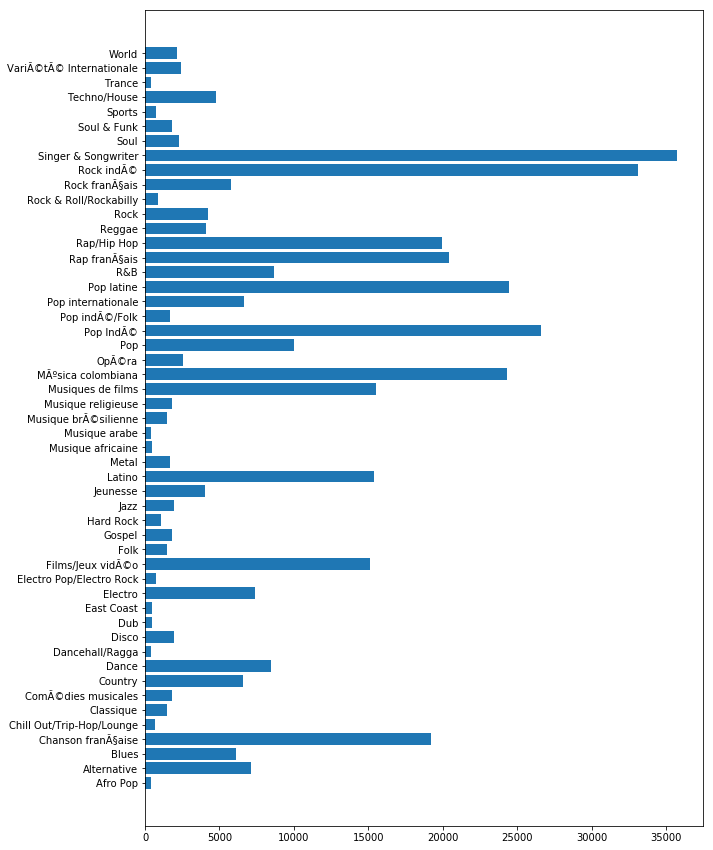

In [13]:
plt.figure(1, figsize=(10, 15))
plt.barh(df_meanusers_per_genre['genre_name'],df_meanusers_per_genre['meanusers'])
plt.show()

In [14]:
df_meanusers_per_genre.tail()

,genre_name,meanstreams,meanusers
28,MÃºsica colombiana,25051.000000,24321.333333
34,Pop latine,25674.714286,24484.571429
31,Pop IndÃ©,29554.500000,26592.400000
42,Rock indÃ©,36848.625000,33147.125000
43,Singer & Songwriter,39227.526316,35708.631579


In [15]:
df_meanusers_per_genre.head()

,genre_name,meanstreams,meanusers
48,Trance,395.0,382.0
9,Dancehall/Ragga,447.0,410.0
0,Afro Pop,458.0,417.0
24,Musique arabe,541.0,427.0
11,Dub,487.0,454.0


    2/ Les top genres par age

In [16]:
df_nusers_per_agegroup = df_labelized_data.groupby(['age_group','genre_name']).sum()
del df_nusers_per_agegroup['d']
del df_nusers_per_agegroup['album_id']

In [17]:
best_1518_genres = df_nusers_per_agegroup.loc['15-18'].sort_values(by=['nusers'],ascending=False).head()

In [18]:
best_1518_genres

,nstreams,nusers
genre_name,,
Rap/Hip Hop,1011482,853283
Rap franÃ§ais,293670,238684
Pop,84409,79076
Dance,33562,32218
R&B,25332,23200


In [19]:
best_more55_genres = df_nusers_per_agegroup.loc['>55'].sort_values(by=['nusers'],ascending=False).head()

In [20]:
best_more55_genres

,nstreams,nusers
genre_name,,
Rap/Hip Hop,100224,84792
Pop,47134,42341
Rap franÃ§ais,24294,19743
Alternative,16833,14530
Dance,10653,10189


    3/ Le top des ages par genre

In [21]:
df_nusers_per_genre_age = df_labelized_data.groupby(['genre_name','age_group']).sum()
del df_nusers_per_genre_age['d']
del df_nusers_per_genre_age['album_id']

In [22]:
df_nusers_per_genre_age.loc['Rap/Hip Hop'].sort_values(by='nusers',ascending=False).head()

,nstreams,nusers
age_group,,
18-24,7182439,6166040
25-34,2672596,2327073
unk,2108860,1806417
15-18,1011482,853283
35-44,698875,612505


In [23]:
df_nusers_per_genre_age.loc['Pop latine'].sort_values(by='nusers',ascending=False).head()

,nstreams,nusers
age_group,,
25-34,66967,63752
18-24,49890,48009
unk,24474,23369
35-44,24273,22843
45-54,8333,7910


    4/ Top genres par ville

In [24]:
df_nusers_per_genre_ville = df_labelized_data.groupby(['loc_city','genre_name']).sum()
del df_nusers_per_genre_ville['d']
del df_nusers_per_genre_ville['album_id']

In [25]:
df_nusers_per_genre_ville.loc['Paris'].sort_values(by='nusers',ascending=False).head()

,nstreams,nusers
genre_name,,
Rap/Hip Hop,9141250,8006944
Pop,2830324,2620155
Rap franÃ§ais,2350142,1995844
Dance,1198122,1154502
Electro,830829,791020


In [26]:
df_nusers_per_genre_ville.loc['Marseille'].sort_values(by='nusers',ascending=False).head()

,nstreams,nusers
genre_name,,
Rap/Hip Hop,263925,213670
Rap franÃ§ais,97361,75271
Pop,38581,35411
Singer & Songwriter,12415,11228
Dance,10708,10317


     5/ Albums ayant le plus d'écoutes 

In [27]:
df_data.groupby(['album_id']).sum().sort_values(by='nstreams',ascending=False).head()

,d,nstreams,nusers
album_id,,,
40687031,1389454826278,1060411,853577
14720858,1137372668812,862771,693177
14721048,1011389459291,757343,588273
14530576,901884200487,662649,572440
15810564,717727824785,573614,447137


1 060 411 écoutes pour l'album le plus écouté

        6/ Nomnbre d'albums dans la base de données

In [28]:
len(df_data.groupby(['album_id']).sum())

1558

1558 albums au total

    7/ date de sortie la plus récente et dernière date de données streaming enregistré dans la base

In [29]:
df_data['d']=pd.to_datetime(df_data['d'], format='%Y%m%d', errors='ignore')

df_data.groupby(['album_id']).min().sort_values(by='d',ascending=False).head()

,age_group,d,loc_city,nstreams,nusers,platform_name
album_id,,,,,,
45032311,18-24,2017-07-28,Asnieres-sur-Seine,3,3,android
45282041,15-18,2017-07-28,Asnieres-sur-Seine,3,3,android
45272861,18-24,2017-07-28,Asnieres-sur-Seine,3,3,android
44182161,15-18,2017-07-28,Aix-en-Provence,3,3,android
45155431,15-18,2017-07-28,Asnieres-sur-Seine,3,3,android


La date de sortie la plus récente d'un album enregistré dans la base est le 28 juillet 2017

In [30]:
df_data.sort_values(by='d',ascending=False).head()

,age_group,album_id,d,loc_city,nstreams,nusers,platform_name
518896,18-24,42032301,2017-09-29,Paris,6,6,ios
1177504,18-24,15332349,2017-09-29,CrÃ©teil,4,3,ios
1324893,18-24,42888431,2017-09-29,Lyon,8,8,ios
1976161,unk,42786221,2017-09-29,Paris,5,4,android
1627317,35-44,39431341,2017-09-29,Paris,4,4,web


Le dernier enregistrement à été effectué le 29 septembre 2017. Donc nous disposons d'au minimum 2 mois de données streaming pour chaque album.

# Transformation des données

In [82]:
def transformAlbumData(df_datax, cities, nbTemps, interJours):
    
    #Récupération de la date de sortie de l'album sur deezer
    date_sortie=df_datax.sort_values(by='d').iloc[0]['d']
    datax=np.zeros((nbTemps,len(cities)))
    
    #Pour chaque pas de temps de (interJours) jours et villes, on compte le nombre d'écoutes.
    for i in range(nbTemps): 
        date_inf=date_sortie+pd.Timedelta(days=i*interJours)
        date_sup=date_sortie+pd.Timedelta(days=(i+1)*interJours)
        #On récupère toutes les données compris entre la date date_inf et date_sup
        df_temps=df_datax.query('d >= @date_inf and d < @date_sup')
        #On regroupe par villes
        df_temps=df_temps.groupby(['loc_city']).sum()
        
        for city in df_temps.index.values:
            #On stocke les valeurs pour chaque pays dans un tableau numpy.
            j=np.argwhere(cities==city)[0][0]
            datax[i,j]=df_temps.loc[city]['nstreams']
         
    #On fait de même pour le restes des données qui n'ont pas été inclus dans les pas de temps
    df_temps=df_datax.loc[(df_datax['d']>=date_sortie+pd.Timedelta(days=nbTemps*interJours))]
    df_temps=df_temps.groupby(['loc_city']).sum()
    
    for city in df_temps.index.values:
        j=np.argwhere(cities==city)[0][0]
        datax[i,j]=df_temps.loc[city]['nstreams']
            
    return datax
        

In [83]:
def transformAllAlbumData(df_datax,df_datay,nbTemps,interJours):
    
    #nbtemps = nombre de pas de temps
    #interJours = nombre de jours d'un pas de temps
    
    albumIds=np.array(sorted(set(df_datax['album_id'])))
    cities=np.array(sorted(set(df_datax['loc_city'])))
    
    #Tenseur des données de streaming en fonction des villes et des pas de temps pour chaque album
    datax=np.array([transformAlbumData(df_datax.loc[df_datax['album_id']==albumId], cities, nbTemps, interJours) for albumId in albumIds])
    #Tenseur des genres des albums
    datay=np.array([np.array(set(df_datay.loc[df_datay['album_id']==albumId]['genre_name'])) for albumId in albumIds])
    
    return datax, datay

In [84]:
df_data['d']=pd.to_datetime(df_data['d'], format='%Y%m%d', errors='ignore')

In [85]:
datax, datay = transformAllAlbumData(df_data, df_labels, 10, 30)

In [86]:
cities=np.array(sorted(set(df_data['loc_city'])))
dt=transformAlbumData(df_data.loc[df_data['album_id']==40687031], cities, 10, 30)

In [87]:
dt[5][1760]

7242.0

In [88]:
datay

array([array({'Dance'}, dtype=object), array({'Electro'}, dtype=object),
       array({'Electro', 'Dance'}, dtype=object), ...,
       array({'Rap/Hip Hop'}, dtype=object),
       array({'Rap/Hip Hop', 'Rap franÃ§ais'}, dtype=object),
       array({'Rap/Hip Hop'}, dtype=object)], dtype=object)